<a href="https://colab.research.google.com/github/HSE-LAMBDA/MLDM-2021/blob/master/08-ensembles/Ensembles_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# Load the California housing dataset
dataset = fetch_california_housing()

# Create a DataFrame from the dataset
data = pd.DataFrame(dataset.data, columns=dataset.feature_names)
data['target'] = dataset.target

# Print the length of the dataset and display the first 10 rows
print("Length of the dataset:", len(data))
print("First 10 rows of the dataset:")
print(data.head(10))


Length of the dataset: 20640
First 10 rows of the dataset:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
5  4.0368      52.0  4.761658   1.103627       413.0  2.139896     37.85   
6  3.6591      52.0  4.931907   0.951362      1094.0  2.128405     37.84   
7  3.1200      52.0  4.797527   1.061824      1157.0  1.788253     37.84   
8  2.0804      42.0  4.294118   1.117647      1206.0  2.026891     37.84   
9  3.6912      52.0  4.970588   0.990196      1551.0  2.172269     37.84   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25

In [12]:
dataset = fetch_california_housing()

data = pd.DataFrame(dataset.data, columns=dataset.feature_names)
data['target'] = dataset.target

print(len(data))
data.head(10)

20640


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


In [2]:
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

This data contains 2 spacial features: `['Longitude', 'Latitude']`:

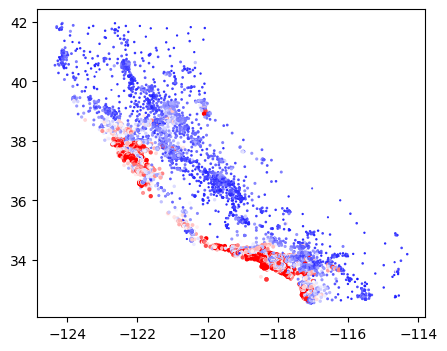

In [3]:
plt.figure(figsize=(5, 4), dpi=100)
plt.scatter(data.Longitude, data.Latitude, s=data.target, c=data.target, cmap='bwr');

(Compare this plot with the map of California: https://en.wikipedia.org/wiki/California)

A kNN model might be quite reasonable to use on this 2D subspace.

Let's first divide our data into train and test:

In [4]:
X, y = data.drop('target', axis=1), data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1234)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(15480, 8) (5160, 8) (15480,) (5160,)


 - Build a kNN regressor on the `Longitude` and `Latitude` features (**0.5 point**)
 - Build a random forest regressor on the rest of the features (**0.5 point**)
 - Build a stacking regressor (`sklearn.ensemble.StackingRegressor`) with 5-fold cross-val-predict using the two models above as the base models and a linear regression model as the final (aggregating) estimator. Don't forget to optimize hyper-parameters of your models. (**4 points**)
 - Compare the test MSE losses of the 3 models above, leave a comment (**1 point**)


Make sure to have a look at the documentation:
https://scikit-learn.org/stable/modules/ensemble.html#stacking

You can make a pipeline (`sklearn.pipeline.make_pipeline`) with a `ColumnTransformer` (`sklearn.compose.make_column_transformer`) and a regression model (knn or random forest), where the `ColumnTransformer` will select the desired columns from the dataset (see the docs for the column transformer: https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_transformer.html).

In [5]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

In [6]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.compose import make_column_selector as selector

# Select only Longitude and Latitude features
preprocessor_knn = make_column_transformer(
    (selector(['Longitude', 'Latitude']), 'passthrough')
)

# Build kNN regressor
knn_regressor = make_pipeline(preprocessor_knn, KNeighborsRegressor())


In [7]:
from sklearn.ensemble import RandomForestRegressor

# Select all features except Longitude and Latitude
preprocessor_rf = make_column_transformer(
    (selector(['Longitude', 'Latitude']), 'drop'),
    (selector(slice(2, None)), 'passthrough')
)

# Build random forest regressor
rf_regressor = make_pipeline(preprocessor_rf, RandomForestRegressor(random_state=1234))


MSE for kNN: 0.29662179425229945
MSE for Random Forest: 0.4300904261382853
MSE for Stacking: 0.2670584850223469


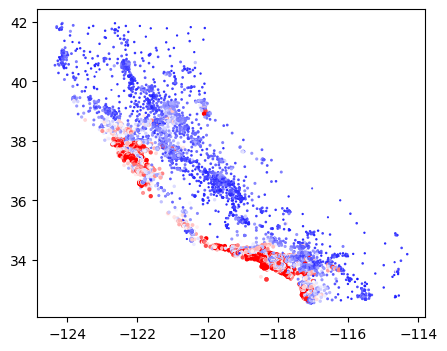

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error

dataset = fetch_california_housing()
data = pd.DataFrame(dataset.data, columns=dataset.feature_names)
data['target'] = dataset.target
plt.figure(figsize=(5, 4), dpi=100)
plt.scatter(data.Longitude, data.Latitude, s=data.target, c=data.target, cmap='bwr')
X, y = data.drop('target', axis=1), data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1234)

X_train_knn = X_train[['Longitude', 'Latitude']]
X_train_rf = X_train.drop(['Longitude', 'Latitude'], axis=1)
X_test_knn = X_test[['Longitude', 'Latitude']]
X_test_rf = X_test.drop(['Longitude', 'Latitude'], axis=1)

knn_param_grid = {'kneighborsregressor__n_neighbors': [3, 5, 7]}
knn_regressor = make_pipeline(KNeighborsRegressor())
knn_grid = GridSearchCV(knn_regressor, param_grid=knn_param_grid, cv=5, n_jobs=-1)
knn_grid.fit(X_train_knn, y_train)

rf_param_grid = {'randomforestregressor__n_estimators': [50, 100, 200]}
rf_regressor = make_pipeline(RandomForestRegressor(random_state=1234))
rf_grid = GridSearchCV(rf_regressor, param_grid=rf_param_grid, cv=5, n_jobs=-1)
rf_grid.fit(X_train_rf, y_train)

stacked_regressor = StackingRegressor(
    estimators=[('knn', knn_grid.best_estimator_), ('rf', rf_grid.best_estimator_)],
    final_estimator=LinearRegression()
)

stacked_regressor.fit(X_train, y_train)

stacked_predictions = stacked_regressor.predict(X_test)

mse_knn = mean_squared_error(y_test, knn_grid.best_estimator_.predict(X_test_knn))
mse_rf = mean_squared_error(y_test, rf_grid.best_estimator_.predict(X_test_rf))
mse_stacked = mean_squared_error(y_test, stacked_predictions)

print(f'MSE for kNN: {mse_knn}')
print(f'MSE for Random Forest: {mse_rf}')
print(f'MSE for Stacking: {mse_stacked}')
# Here random forest has the highest MSE loss, whereas the other two methods have closer to each other loss values

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the California housing dataset
dataset = fetch_california_housing()
data = pd.DataFrame(dataset.data, columns=dataset.feature_names)
data['target'] = dataset.target

# Split the data into features and target variable
X, y = data.drop('target', axis=1), data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1234)

# Define a ColumnTransformer to select specific columns for kNN and Random Forest
preprocessor = ColumnTransformer(
    transformers=[
        ('knn_cols', 'passthrough', ['Longitude', 'Latitude']),
        ('rf_cols', 'drop', ['Longitude', 'Latitude']),
    ]
)

# Define the kNN pipeline
knn_regressor = make_pipeline(preprocessor, KNeighborsRegressor())
knn_param_grid = {'kneighborsregressor__n_neighbors': [3, 5, 7]}
knn_grid = GridSearchCV(knn_regressor, param_grid=knn_param_grid, cv=5, n_jobs=-1)
knn_grid.fit(X_train, y_train)

# Define the Random Forest pipeline
rf_regressor = make_pipeline(preprocessor, RandomForestRegressor(random_state=1234))
rf_param_grid = {'randomforestregressor__n_estimators': [50, 100, 200]}
rf_grid = GridSearchCV(rf_regressor, param_grid=rf_param_grid, cv=5, n_jobs=-1)
rf_grid.fit(X_train, y_train)

# Define the Stacking Regressor with the best estimators from kNN and Random Forest
stacked_regressor = StackingRegressor(
    estimators=[('knn', knn_grid.best_estimator_), ('rf', rf_grid.best_estimator_)],
    final_estimator=LinearRegression()
)

# Train the Stacking Regressor
stacked_regressor.fit(X_train, y_train)

# Make predictions using the trained models
knn_predictions = knn_grid.best_estimator_.predict(X_test)
rf_predictions = rf_grid.best_estimator_.predict(X_test)
stacked_predictions = stacked_regressor.predict(X_test)

# Calculate MSE for each model
mse_knn = mean_squared_error(y_test, knn_predictions)
mse_rf = mean_squared_error(y_test, rf_predictions)
mse_stacked = mean_squared_error(y_test, stacked_predictions)

print(f'MSE for kNN: {mse_knn}')
print(f'MSE for Random Forest: {mse_rf}')
print(f'MSE for Stacking: {mse_stacked}')


MSE for kNN: 0.29662179425229945
MSE for Random Forest: 0.30326458022463987
MSE for Stacking: 0.2804532050027672


MSE for kNN: 0.29662179425229945
MSE for Random Forest: 0.4300904261382853
MSE for Stacking: 0.2670584850223469


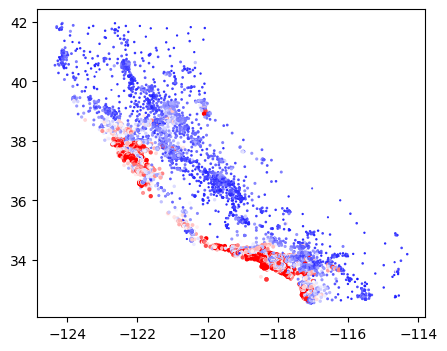

In [13]:

dataset = fetch_california_housing()
data = pd.DataFrame(dataset.data, columns=dataset.feature_names)
data['target'] = dataset.target
plt.figure(figsize=(5, 4), dpi=100)
plt.scatter(data.Longitude, data.Latitude, s=data.target, c=data.target, cmap='bwr')
X, y = data.drop('target', axis=1), data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1234)

X_train_knn = X_train[['Longitude', 'Latitude']]
X_train_rf = X_train.drop(['Longitude', 'Latitude'], axis=1)
X_test_knn = X_test[['Longitude', 'Latitude']]
X_test_rf = X_test.drop(['Longitude', 'Latitude'], axis=1)

knn_param_grid = {'kneighborsregressor__n_neighbors': [3, 5, 7]}
knn_regressor = make_pipeline(KNeighborsRegressor())
knn_grid = GridSearchCV(knn_regressor, param_grid=knn_param_grid, cv=5, n_jobs=-1)
knn_grid.fit(X_train_knn, y_train)

rf_param_grid = {'randomforestregressor__n_estimators': [50, 100, 200]}
rf_regressor = make_pipeline(RandomForestRegressor(random_state=1234))
rf_grid = GridSearchCV(rf_regressor, param_grid=rf_param_grid, cv=5, n_jobs=-1)
rf_grid.fit(X_train_rf, y_train)

stacked_regressor = StackingRegressor(
    estimators=[('knn', knn_grid.best_estimator_), ('rf', rf_grid.best_estimator_)],
    final_estimator=LinearRegression()
)

stacked_regressor.fit(X_train, y_train)

stacked_predictions = stacked_regressor.predict(X_test)

mse_knn = mean_squared_error(y_test, knn_grid.best_estimator_.predict(X_test_knn))
mse_rf = mean_squared_error(y_test, rf_grid.best_estimator_.predict(X_test_rf))
mse_stacked = mean_squared_error(y_test, stacked_predictions)

print(f'MSE for kNN: {mse_knn}')
print(f'MSE for Random Forest: {mse_rf}')
print(f'MSE for Stacking: {mse_stacked}')
# Here random forest has the highest MSE loss, whereas the other two methods have closer to each other loss values